"""
Tight-Binding Band Structure Visualization
------------------------------------------

This notebook computes and visualizes the electronic band structure of a crystal
along high-symmetry directions in the Brillouin zone, using a simplified
tight-binding model.

Key Features:
- High-symmetry path: Γ → X → W → K → Γ → L
- Simplified 4x4 sp³-like Hamiltonian (demo structure)
- k-point interpolation and energy eigenvalue extraction

Physical Context:
This setup is based on the tight-binding approximation, useful in modeling
valence/conduction bands of semiconductors like Si, Ge, GaAs (cf. Chadi & Cohen 1975).

"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define important high-symmetry points in the Brillouin zone (cubic lattice units)
k_points = {
    'Γ': [0, 0, 0],
    'X': [0.5, 0, 0],
    'W': [0.5, 0.25, 0.75],
    'K': [0.375, 0.375, 0.75],
    'L': [0.5, 0.5, 0.5]
}

# Path of k-points in reciprocal space
path = ['Γ', 'X', 'W', 'K', 'Γ', 'L']
steps_per_segment = 40  # Number of k-points between each high-symmetry pair

In [3]:
k_path = []       # list of k-points (vectors)
k_dist = []       # cumulative k-path distance for x-axis
label_pos = []    # x-axis position of symmetry labels
current_dist = 0

for i in range(len(path) - 1):
    start = np.array(k_points[path[i]])
    end = np.array(k_points[path[i + 1]])
    segment = np.linspace(start, end, steps_per_segment)

    for j, kpt in enumerate(segment):
        k_path.append(kpt)

        if len(k_dist) == 0:
            k_dist.append(0)
        else:
            delta = np.linalg.norm(kpt - k_path[-2])
            current_dist += delta
            k_dist.append(current_dist)

        if j == 0:
            label_pos.append(current_dist)

# Add final point label
label_pos.append(current_dist)

In [4]:
def hamiltonian(k):
    """
    Simplified 4x4 tight-binding Hamiltonian matrix.
    This is a placeholder, mimicking sp³ interactions.
    """
    H = np.zeros((4, 4), dtype=complex)
    kx, ky, kz = k

    # Toy off-diagonal terms simulating direction-dependent overlap
    H[0, 1] = H[1, 0] = np.exp(2j * np.pi * kx)
    H[1, 2] = H[2, 1] = np.exp(2j * np.pi * ky)
    H[2, 3] = H[3, 2] = np.exp(2j * np.pi * kz)

    return H + H.conj().T  # Enforce Hermitian symmetry

In [5]:
# Loop through k-points and compute eigenvalues
bands = []
for k in k_path:
    H = hamiltonian(k)
    eigenvals = np.linalg.eigvalsh(H)  # Hermitian matrix = real eigenvalues
    bands.append(np.sort(np.real(eigenvals)))

bands = np.array(bands).T  # shape: (num_bands, num_k_points)

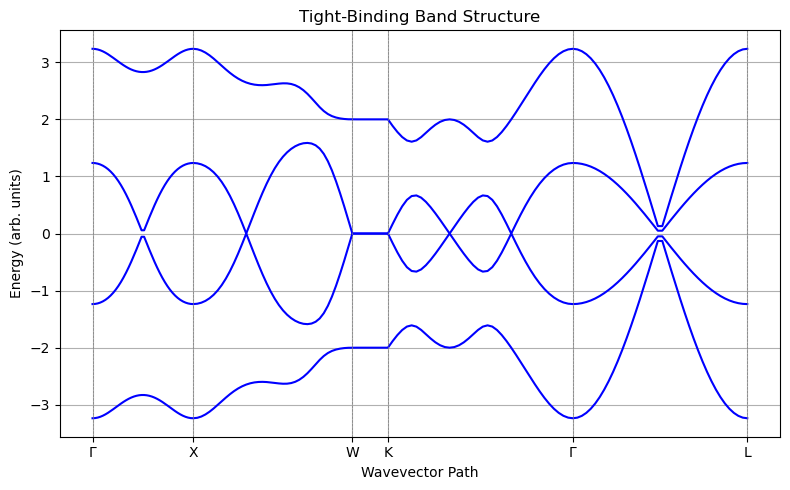

In [6]:
plt.figure(figsize=(8, 5))
for band in bands:
    plt.plot(k_dist, band, color='blue')

# Add vertical lines at label positions
for pos in label_pos:
    plt.axvline(pos, color='gray', linestyle='--', linewidth=0.5)

plt.xticks(label_pos, path)
plt.xlabel("Wavevector Path")
plt.ylabel("Energy (arb. units)")
plt.title("Tight-Binding Band Structure")
plt.grid(True)
plt.tight_layout()
plt.show()

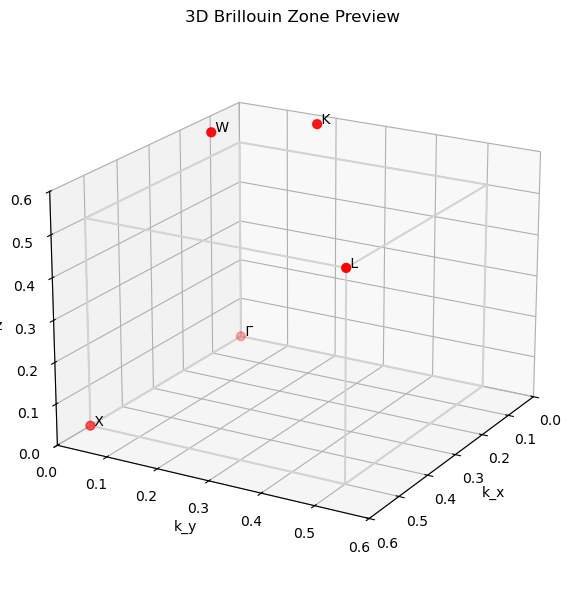

In [11]:
# Optional: run this if you want interactivity
#matplotlib notebook  # or %matplotlib inline for static

from mpl_toolkits.mplot3d import Axes3D

# Reuse the same high-symmetry points
labels_3D = list(k_points.keys())
coords_3D = np.array([k_points[k] for k in labels_3D])

# Draw a cube (1st Brillouin zone of simple cubic lattice)
cube_edges = np.array([
    [0, 0, 0], [0.5, 0, 0], [0.5, 0.5, 0], [0, 0.5, 0],
    [0, 0, 0.5], [0.5, 0, 0.5], [0.5, 0.5, 0.5], [0, 0.5, 0.5]
])

# Define cube edge connections (index pairs)
edges = [
    (0,1), (1,2), (2,3), (3,0),  # bottom face
    (4,5), (5,6), (6,7), (7,4),  # top face
    (0,4), (1,5), (2,6), (3,7)   # verticals
]

# Plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot cube edges
for i, j in edges:
    ax.plot(*zip(cube_edges[i], cube_edges[j]), color='lightgray')

# Plot high-symmetry points
ax.scatter(coords_3D[:, 0], coords_3D[:, 1], coords_3D[:, 2], color='red', s=40)
for i, label in enumerate(labels_3D):
    ax.text(coords_3D[i, 0], coords_3D[i, 1], coords_3D[i, 2], f' {label}', fontsize=10)

ax.set_title("3D Brillouin Zone Preview")
ax.set_xlabel("k_x")
ax.set_ylabel("k_y")
ax.set_zlabel("k_z")
ax.set_xlim([0, 0.6])
ax.set_ylim([0, 0.6])
ax.set_zlim([0, 0.6])
ax.view_init(elev=20, azim=30)  # nice viewing angle
plt.tight_layout()
plt.show()